**This code is used to visualize images passing through different layers.**

# Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# CUDA

In [2]:
CUDA = torch.cuda.is_available()
CUDA

False

# Hyperparameters

In [3]:
kernel_size_cnn = 3
kernel_size_pool = 2
stride = 1
padding = 1
ratio = 64 # You can use this in the transforms
in_channels = 3
hidden_channels1 = 64
hidden_channels2 = 128

# Model

In [4]:
class CNN_Viz1(nn.Module):
    def __init__(
            self, 
            in_channels, 
            hidden_channels1, 
            hidden_channels2, 
            kernel_size_cnn=3, 
            kernel_size_pool=2, 
            stride=1, 
            padding=1
            ):
        super().__init__()

        self.cnn1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=hidden_channels1,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
            )
        
        self.batchnorm1 = nn.BatchNorm2d(hidden_channels1)
        self.maxpool = nn.MaxPool2d(kernel_size=kernel_size_pool)

        self.cnn2 = nn.Conv2d(
            in_channels=hidden_channels1,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

        self.batchnorm2 = nn.BatchNorm2d(hidden_channels2)

        self.cnn3 = nn.Conv2d(
            in_channels=hidden_channels2,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

    def forward(self, x):
        outputs = []
        labels = []

        out = self.cnn1(x)
        outputs.append(out)
        labels.append("conv2d-1")

        out = self.batchnorm1(out)
        outputs.append(out)
        labels.append("BatchNorm-1")


        out = nn.functional.softmax(out, dim=2)
        outputs.append(out)
        labels.append("Softmax-1-height")


        out = self.maxpool(out)
        outputs.append(out)
        labels.append("Maxpool-1")


        out = self.cnn2(out)
        outputs.append(out)
        labels.append(f"conv2d-2")

        out = self.batchnorm2(out)
        outputs.append(out)
        labels.append(f"BatchNorm-2")

        out = nn.functional.softmax(out, dim=2)
        outputs.append(out)
        labels.append("Softmax-2-height")

        out = self.maxpool(out)
        outputs.append(out)
        labels.append(f"Maxpool-2")
    

        least_size1, least_size2 = 5, 5
        actual_size1, actual_size2 = out.shape[-2:]
        j = 3


        while(actual_size1 > least_size1 and actual_size2 > least_size2):

            out = self.cnn3(out)
            outputs.append(out)
            labels.append(f"conv2d-{str(j)}")

            out = self.batchnorm2(out)
            outputs.append(out)
            labels.append(f"BatchNorm-{str(j)}")

            out = nn.functional.softmax(out, dim=2)
            outputs.append(out)
            labels.append(f"Softmax-{str(j)}-height")

            out = self.maxpool(out)
            outputs.append(out)
            labels.append(f"Maxpool-{str(j)}")

            j += 1
            actual_size1, actual_size2 = out.shape[-2:]

        return outputs, labels

In [5]:
class CNN_Viz2(nn.Module):
    def __init__(
            self, 
            in_channels, 
            hidden_channels1, 
            hidden_channels2, 
            kernel_size_cnn=3, 
            kernel_size_pool=2, 
            stride=1, 
            padding=1
            ):
        super().__init__()

        self.cnn1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=hidden_channels1,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
            )
        
        self.batchnorm1 = nn.BatchNorm2d(hidden_channels1)
        self.maxpool = nn.MaxPool2d(kernel_size=kernel_size_pool)

        self.cnn2 = nn.Conv2d(
            in_channels=hidden_channels1,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

        self.batchnorm2 = nn.BatchNorm2d(hidden_channels2)

        self.cnn3 = nn.Conv2d(
            in_channels=hidden_channels2,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

    def forward(self, x):
        outputs = []
        labels = []

        out = self.cnn1(x)
        outputs.append(out)
        labels.append("conv2d-1")

        out = self.batchnorm1(out)
        outputs.append(out)
        labels.append("BatchNorm-1")

        out = nn.functional.softmax(out, dim=3)
        outputs.append(out)
        labels.append("Softmax-1-width")


        out = self.maxpool(out)
        outputs.append(out)
        labels.append("Maxpool-1")


        out = self.cnn2(out)
        outputs.append(out)
        labels.append(f"conv2d-2")

        out = self.batchnorm2(out)
        outputs.append(out)
        labels.append(f"BatchNorm-2")

        out = nn.functional.softmax(out, dim=3)
        outputs.append(out)
        labels.append(f"Softmax-2-width")

        out = self.maxpool(out)
        outputs.append(out)
        labels.append(f"Maxpool-2")
    

        least_size1, least_size2 = 5, 5
        actual_size1, actual_size2 = out.shape[-2:]
        j = 3


        while(actual_size1 > least_size1 and actual_size2 > least_size2):

            out = self.cnn3(out)
            outputs.append(out)
            labels.append(f"conv2d-{str(j)}")

            out = self.batchnorm2(out)
            outputs.append(out)
            labels.append(f"BatchNorm-{str(j)}")

            out = nn.functional.softmax(out, dim=3)
            outputs.append(out)
            labels.append(f"Softmax-{str(j)}-width")

            out = self.maxpool(out)
            outputs.append(out)
            labels.append(f"Maxpool-{str(j)}")

            j += 1
            actual_size1, actual_size2 = out.shape[-2:]

        return outputs, labels

In [6]:
class CNN_Viz3(nn.Module):
    def __init__(
            self, 
            in_channels, 
            hidden_channels1, 
            hidden_channels2, 
            kernel_size_cnn=3, 
            kernel_size_pool=2, 
            stride=1, 
            padding=1
            ):
        super().__init__()

        self.cnn1 = nn.Conv2d(
            in_channels=in_channels,
            out_channels=hidden_channels1,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
            )
        
        self.batchnorm1 = nn.BatchNorm2d(hidden_channels1)
        self.maxpool = nn.MaxPool2d(kernel_size=kernel_size_pool)

        self.cnn2 = nn.Conv2d(
            in_channels=hidden_channels1,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

        self.batchnorm2 = nn.BatchNorm2d(hidden_channels2)

        self.cnn3 = nn.Conv2d(
            in_channels=hidden_channels2,
            out_channels=hidden_channels2,
            kernel_size=kernel_size_cnn,
            stride=stride,
            padding=padding
        )

    def forward(self, x):
        outputs = []
        labels = []

        out = self.cnn1(x)
        outputs.append(out)
        labels.append("conv2d-1")

        out = self.batchnorm1(out)
        outputs.append(out)
        labels.append("BatchNorm-1")


        out = nn.functional.softmax(out, dim=2)
        outputs.append(out)
        labels.append("Softmax-1-height")

        out = nn.functional.softmax(out, dim=3)
        outputs.append(out)
        labels.append("Softmax-1-width")


        out = self.maxpool(out)
        outputs.append(out)
        labels.append("Maxpool-1")


        out = self.cnn2(out)
        outputs.append(out)
        labels.append(f"conv2d-2")

        out = self.batchnorm2(out)
        outputs.append(out)
        labels.append(f"BatchNorm-2")

        out = nn.functional.softmax(out, dim=2)
        outputs.append(out)
        labels.append("Softmax-2-height")

        out = nn.functional.softmax(out, dim=3)
        outputs.append(out)
        labels.append(f"Softmax-2-width")

        out = self.maxpool(out)
        outputs.append(out)
        labels.append(f"Maxpool-2")
    

        least_size1, least_size2 = 5, 5
        actual_size1, actual_size2 = out.shape[-2:]
        j = 3


        while(actual_size1 > least_size1 and actual_size2 > least_size2):

            out = self.cnn3(out)
            outputs.append(out)
            labels.append(f"conv2d-{str(j)}")

            out = self.batchnorm2(out)
            outputs.append(out)
            labels.append(f"BatchNorm-{str(j)}")

            out = nn.functional.softmax(out, dim=2)
            outputs.append(out)
            labels.append(f"Softmax-{str(j)}-height")

            out = nn.functional.softmax(out, dim=3)
            outputs.append(out)
            labels.append(f"Softmax-{str(j)}-width")

            out = self.maxpool(out)
            outputs.append(out)
            labels.append(f"Maxpool-{str(j)}")

            j += 1
            actual_size1, actual_size2 = out.shape[-2:]

        return outputs, labels

# Loading Image

In [8]:
from PIL import Image
img = Image.open("cat.jpg")
train_transform = transforms.Compose([transforms.ToTensor()])
image = train_transform(img)
image = image.unsqueeze(0)
if CUDA:
    image = image.cuda()
image.shape


torch.Size([1, 3, 637, 640])

# Initializing Model

In [9]:
cnn_model1 = CNN_Viz1(
    in_channels=in_channels,
    hidden_channels1=hidden_channels1,
    hidden_channels2=hidden_channels2,
    )
cnn_model1

CNN_Viz1(
  (cnn1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [10]:
cnn_model2 = CNN_Viz2(
    in_channels=in_channels,
    hidden_channels1=hidden_channels1,
    hidden_channels2=hidden_channels2,
    )
cnn_model2

CNN_Viz2(
  (cnn1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [11]:
cnn_model3 = CNN_Viz3(
    in_channels=in_channels,
    hidden_channels1=hidden_channels1,
    hidden_channels2=hidden_channels2,
    )
cnn_model3

CNN_Viz3(
  (cnn1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cnn3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [12]:
if CUDA:
    cnn_model1 = cnn_model1.cuda()
outputs1, labels1 = cnn_model1(image)

if CUDA:
    cnn_model2 = cnn_model2.cuda()
outputs2, labels2 = cnn_model2(image)

if CUDA:
    cnn_model3 = cnn_model3.cuda()
outputs3, labels3 = cnn_model3(image)

In [13]:
processed1 = []
for feature_map in outputs1:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed1.append(gray_scale.data.cpu().numpy())

processed2 = []
for feature_map in outputs2:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed2.append(gray_scale.data.cpu().numpy())


processed3 = []
for feature_map in outputs3:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed3.append(gray_scale.data.cpu().numpy())

# CNN layers Visualization

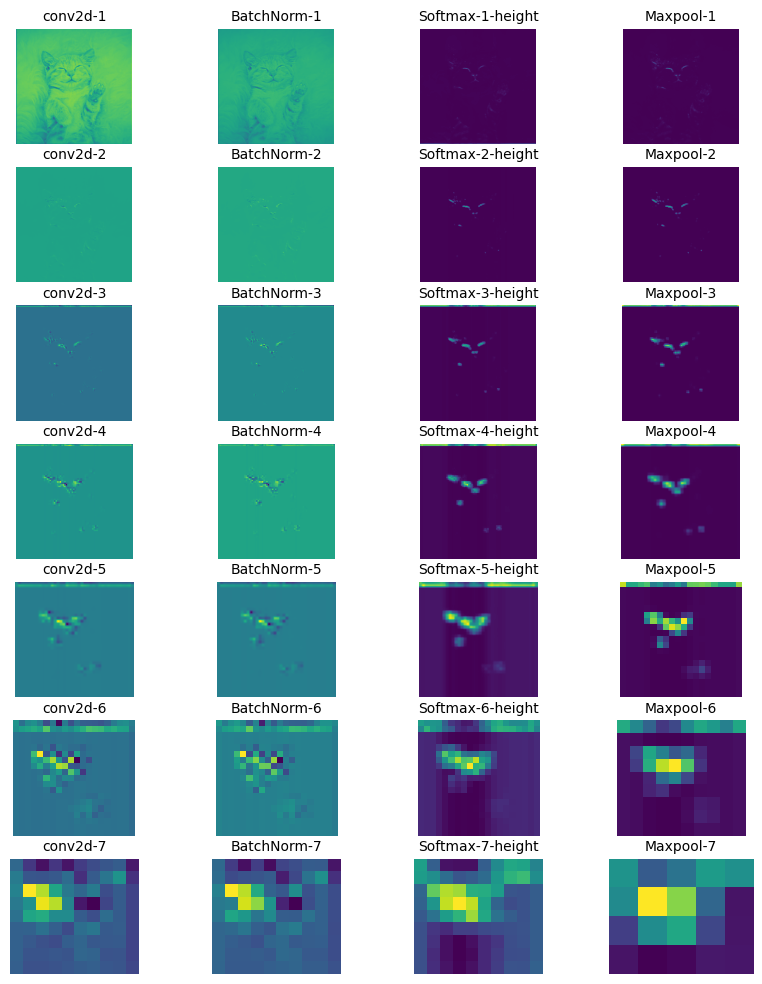

In [14]:
fig = plt.figure(figsize=(10, 50))
for i in range(len(processed1)):
    plots = fig.add_subplot(len(processed1), 4, i + 1)
    imgplot = plt.imshow(processed1[i])
    plt.axis("off")
    plots.set_title(labels1[i], fontsize=10)

plt.savefig('feature_maps1.jpg', bbox_inches="tight", pad_inches=0)

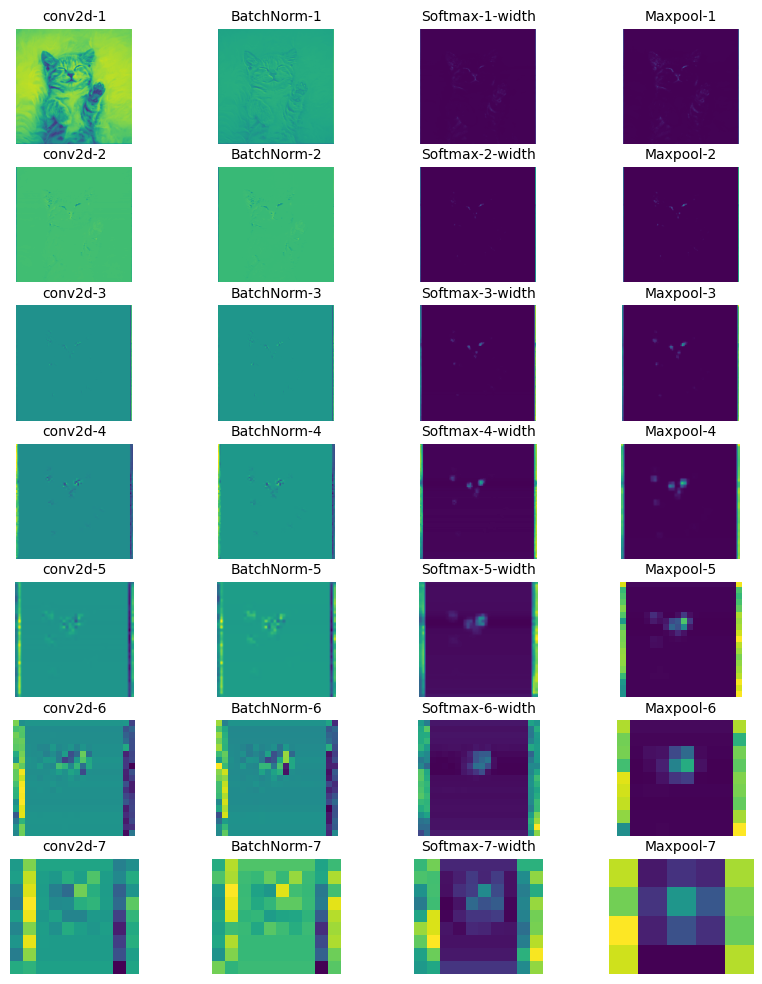

In [15]:
fig = plt.figure(figsize=(10, 50))
for i in range(len(processed2)):
    plots = fig.add_subplot(len(processed2), 4, i + 1)
    imgplot = plt.imshow(processed2[i])
    plt.axis("off")
    plots.set_title(labels2[i], fontsize=10)

plt.savefig('feature_maps2.jpg', bbox_inches="tight", pad_inches=0)

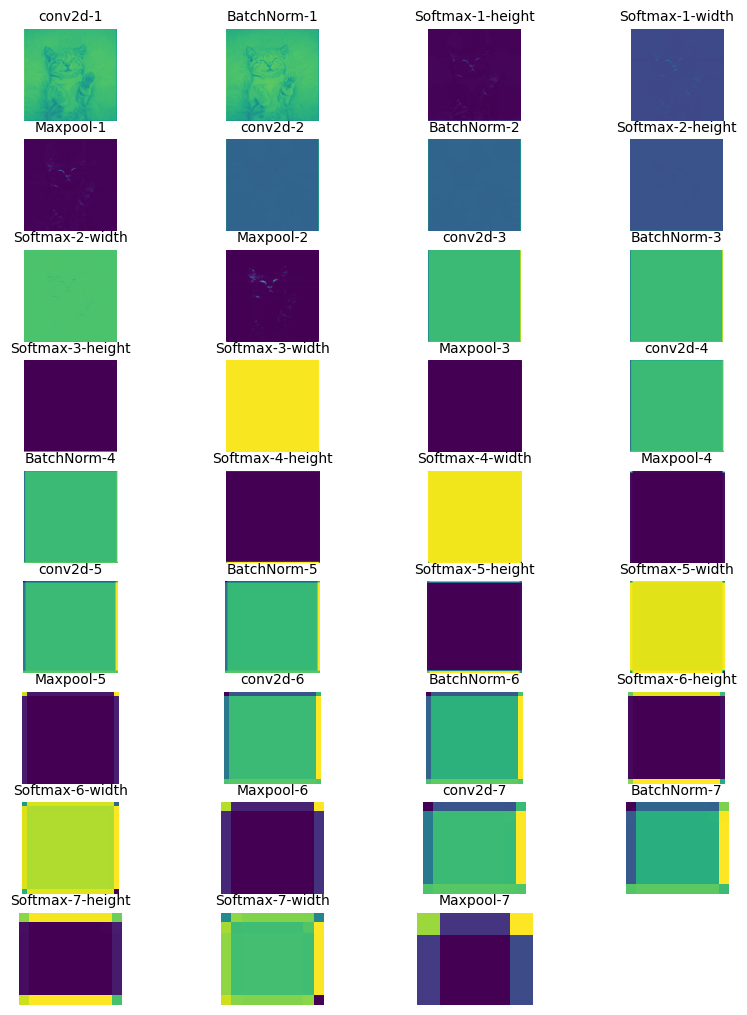

In [16]:
fig = plt.figure(figsize=(10, 50))
for i in range(len(processed3)):
    plots = fig.add_subplot(len(processed3), 4, i + 1)
    imgplot = plt.imshow(processed3[i])
    plt.axis("off")
    plots.set_title(labels3[i], fontsize=10)

plt.savefig('feature_maps3.jpg', bbox_inches="tight", pad_inches=0)

# Individual Layer Visualization

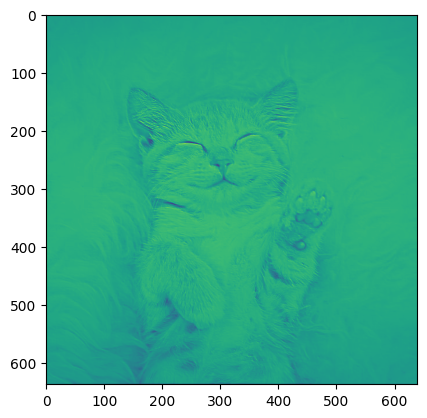

In [17]:
plt.imshow(processed1[1])